In [9]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("../input/chest-xray-pneumonia/chest_xray")

['chest_xray', '__MACOSX', 'val', 'test', 'train']

In [10]:
len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))

3875

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train Set:
PNEUMONIA = 3875
NORMAL = num_normal

Test set:
PNEUMONIA=390
NORMAL=234

Validation set:
PNEUMONIA=8
NORMAL=8
Sample PNEUMONIA --->


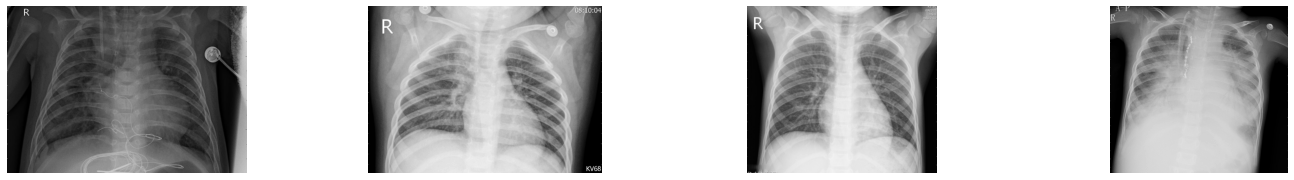

In [11]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

print("Train Set:")

num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
print(f"PNEUMONIA = {num_pneumonia}")
print(f"NORMAL = num_normal")

print()

print("Test set:")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print()

print("Validation set:")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))
print("Sample PNEUMONIA --->")
for i in range(4):
    plt.subplot(4, 4, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

Sample NORMAL


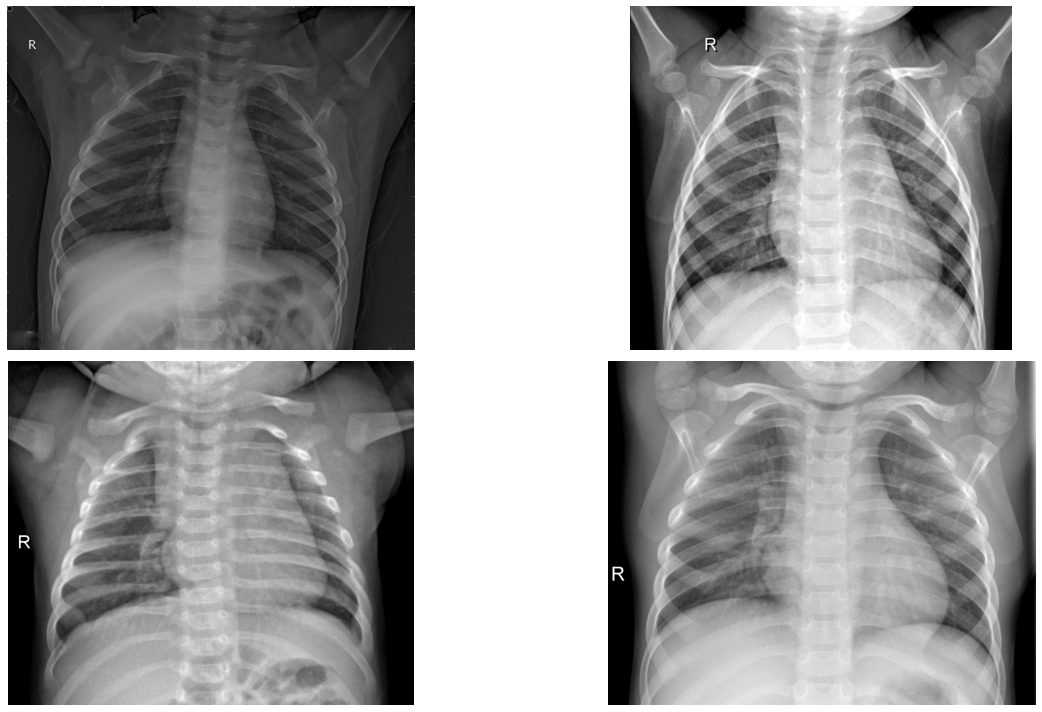

In [12]:
normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
normal_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

print("Sample NORMAL")
for i in range(4):
    plt.subplot(2, 2, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1128 pixels width and 1336 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 73.2978 and the standard deviation is 38.1653


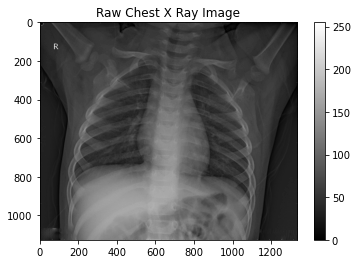

In [13]:
normal_image = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")[0]

normal_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"
sample_image = plt.imread(os.path.join(normal_dir, normal_image))
plt.imshow(sample_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_image.shape[0]} pixels width and {sample_image.shape[1]} pixels height, one single color channel.")

print(f"The maximum pixel value is {sample_image.max():.4f} and the minimum is {sample_image.min():.4f}")

print(f"The mean value of the pixels is {sample_image.mean():.4f} and the standard deviation is {sample_image.std():.4f}")

# Investigate pixel value distribution

Text(0, 0.5, '# Pixels in Image')

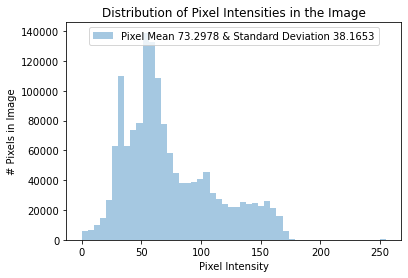

In [14]:
sns.distplot(sample_image.ravel(),
            label=f"Pixel Mean {np.mean(sample_image):.4f} & Standard Deviation {np.std(sample_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll preprocess your images to optimize them for convolutional neural network (CNN) training. This will be done using the Keras ImageDataGenerator function, which allows for both data preprocessing and data augmentation.

In [15]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Building Separate Generators for Validation and Test Sets
To prepare the validation and test data, we need to create separate generators instead of reusing the one designed for training data. Here's why:

Training Generator Behavior: The generator for training data normalizes each image per batch using batch statistics. While this is appropriate for training, it is not suitable for validation or testing.

Real-World Scenario: In real-life applications, incoming images are processed one at a time, not in batches. Normalizing validation or test images based on batch statistics would introduce an unrealistic advantage.

Data Leakage Concern: Using batch statistics from test data during normalization would provide the model with indirect information about the test set, which could unfairly influence performance metrics.

Correct Approach: Validation and test data should be normalized using the statistics computed from the training set to ensure fair evaluation and consistency with real-world usage.

In [16]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.0221 and the minimum is -3.6751
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


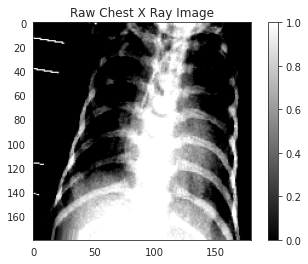

In [26]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")


Text(0, 0.5, '# Pixels in Image')

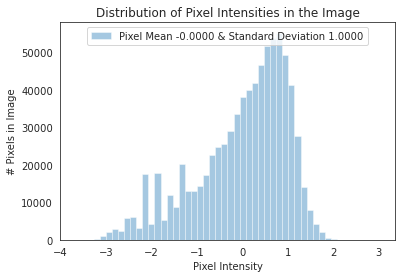

In [27]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

In [18]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.94
Weight for class 1: 0.06


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 86, 86, 64)        2

In [21]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 18s 176ms/step - loss: 0.4739 - accuracy: 0.6288 - val_loss: 15.7964 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 17s 169ms/step - loss: 0.1621 - accuracy: 0.6225 - val_loss: 1.3923 - val_accuracy: 0.6250
Epoch 3/10
100/100 [==============================] - 16s 157ms/step - loss: 0.0814 - accuracy: 0.6550 - val_loss: 1.4418 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 16s 162ms/step - loss: 0.0667 - accuracy: 0.6650 - val_loss: 0.5534 - val_accuracy: 0.6875
Epoch 5/10
100/100 [==============================] - 15s 149ms/step - loss: 0.0498 - accuracy: 0.7262 - val_loss: 0.6236 - val_accuracy: 0.6875
Epoch 6/10
100/100 [==============================] - 15s 150ms/step - loss: 0.0559 - accuracy: 0.7713 - val_loss: 4.7558 - val_accuracy: 0.6250
Epoch 7/10
100/100 [==============================] - 15s 153ms/step - loss: 0.0522 - accuracy: 0.7450 - val_loss: 0.9940 - val_a

Text(0.5, 1.0, 'Accuracy Evolution')

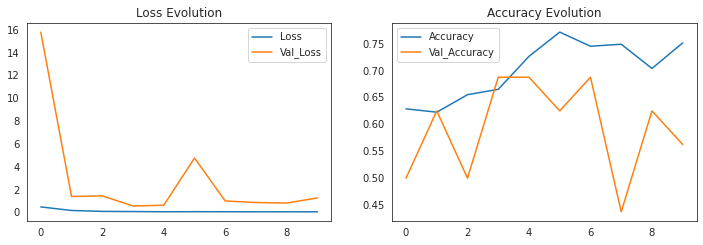

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [23]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 13s 21ms/step - loss: 0.6932 - accuracy: 0.7869
Test Accuracy: 78.69%
652/652 [==============================] - 89s 137ms/step - loss: 0.2195 - accuracy: 0.9266
Train Accuracy: 92.66%


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[111 123]
 [ 11 379]]


,0,1,accuracy,macro avg,weighted avg
precision,0.909836,0.754980,0.785256,0.832408,0.813051
recall,0.474359,0.971795,0.785256,0.723077,0.785256
f1-score,0.623596,0.849776,0.785256,0.736686,0.764958
support,234.000000,390.000000,0.785256,624.000000,624.000000


In [25]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[127 107]
 [ 17 373]]


,0,1,accuracy,macro avg,weighted avg
precision,0.881944,0.777083,0.801282,0.829514,0.816406
recall,0.542735,0.956410,0.801282,0.749573,0.801282
f1-score,0.671958,0.857471,0.801282,0.764714,0.787904
support,234.000000,390.000000,0.801282,624.000000,624.000000
